Importing basic libraries

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Loading ML dedicated libraries

In [2]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Conv1D, BatchNormalization


Using TensorFlow backend.


In [3]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN


Loading the input file and defining the subsamples

In [4]:
f = np.load("../data/featuresData.npz")
inputData = f["arr_0"]

inputData = inputData[:,np.logical_or(inputData[13,:],inputData[14,:])]
nn_inputFeatures = inputData[0:10,:]
triggerFlags = (inputData[10:13,:]).astype(int) == 1
channelFlags = (inputData[13,]).astype(int) == 1


In [5]:
print(triggerFlags)
print(np.sum(triggerFlags[1,triggerFlags[0,:]]))

[[False False  True ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
2958


Importing NN libraries

Definition of the model

In [14]:
batch_size = 500
n_epochs = 100
dropoutRate = 0.1

inputLayer = Input(shape=(10,))
x = BatchNormalization()(inputLayer)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(10, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
outputLayer = Dense(1, activation = 'sigmoid')(x)


In [15]:
model = Model(inputs = inputLayer, outputs = outputLayer)
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40        
_________________________________________________________________
dense_11 (Dense)             (None, 30)                330       
_________________________________________________________________
dropout_9 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_10 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                930 

In [16]:
history = model.fit(np.transpose(nn_inputFeatures), np.transpose(channelFlags), epochs = n_epochs, batch_size = batch_size, verbose = 1,
        validation_split = 0.3, 
        callbacks = [ 
        EarlyStopping(monitor='val_loss', patience=10, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience=2, verbose = 1), 
        TerminateOnNaN()])


Train on 16814 samples, validate on 7207 samples
Epoch 1/100
16814/16814 [==============================] - 3s 159us/step - loss: 0.5285 - acc: 0.7669 - val_loss: 0.2054 - val_acc: 0.9999
Epoch 2/100
16814/16814 [==============================] - 0s 19us/step - loss: 0.3803 - acc: 0.8397 - val_loss: 0.1807 - val_acc: 0.9881
Epoch 3/100
16814/16814 [==============================] - 0s 21us/step - loss: 0.3614 - acc: 0.8455 - val_loss: 0.1669 - val_acc: 0.9720
Epoch 4/100
16814/16814 [==============================] - 0s 21us/step - loss: 0.3564 - acc: 0.8473 - val_loss: 0.1663 - val_acc: 0.9679
Epoch 5/100
16814/16814 [==============================] - 0s 21us/step - loss: 0.3525 - acc: 0.8498 - val_loss: 0.1632 - val_acc: 0.9648
Epoch 6/100
16814/16814 [==============================] - 0s 21us/step - loss: 0.3524 - acc: 0.8507 - val_loss: 0.1674 - val_acc: 0.9630
Epoch 7/100
16814/16814 [==============================] - 0s 23us/step - loss: 0.3463 - acc: 0.8529 - val_loss: 0.1678 - 

Plot of the training history

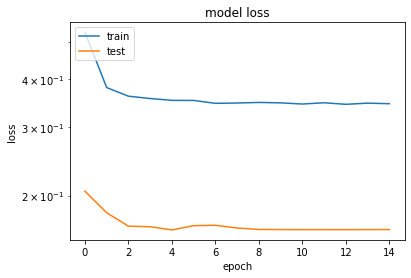

In [17]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()